# **INSURANCE COST PREDICTION**

**Background**

Health insurance is a vital service that provides financial coverage for medical expenses incurred by individuals. Insurance companies need to predict the cost of insurance premiums accurately to ensure profitability and sustainability. Premiums are often based on various factors, such as age, BMI, smoking status, and more. Predicting these costs accurately can help insurance companies offer competitive rates while maintaining financial stability. This project aims to build a predictive model using linear regression to estimate insurance charges based on relevant features.

**Objective**

The primary objective of this project is to develop a linear regression model that can predict the insurance charges for individuals based on their demographic and health-related factors. By analyzing and understanding the relationships between these features and the insurance charges, we aim to provide a reliable model that can aid in setting fair and accurate insurance premiums.

**IMPORTING LIBRARIES**

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

 **Data Source** :

The dataset used in this project is sourced from the internet and provides information on various factors affecting insurance charges.

**DATA DESCRIPTION**

In [11]:
# Load the dataset
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)

In [12]:
# Display the first few rows of the dataset
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [13]:
# Display summary statistics
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [14]:
# Display data information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [15]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**EXPLORATORY DATA ANALYSIS (EDA)**

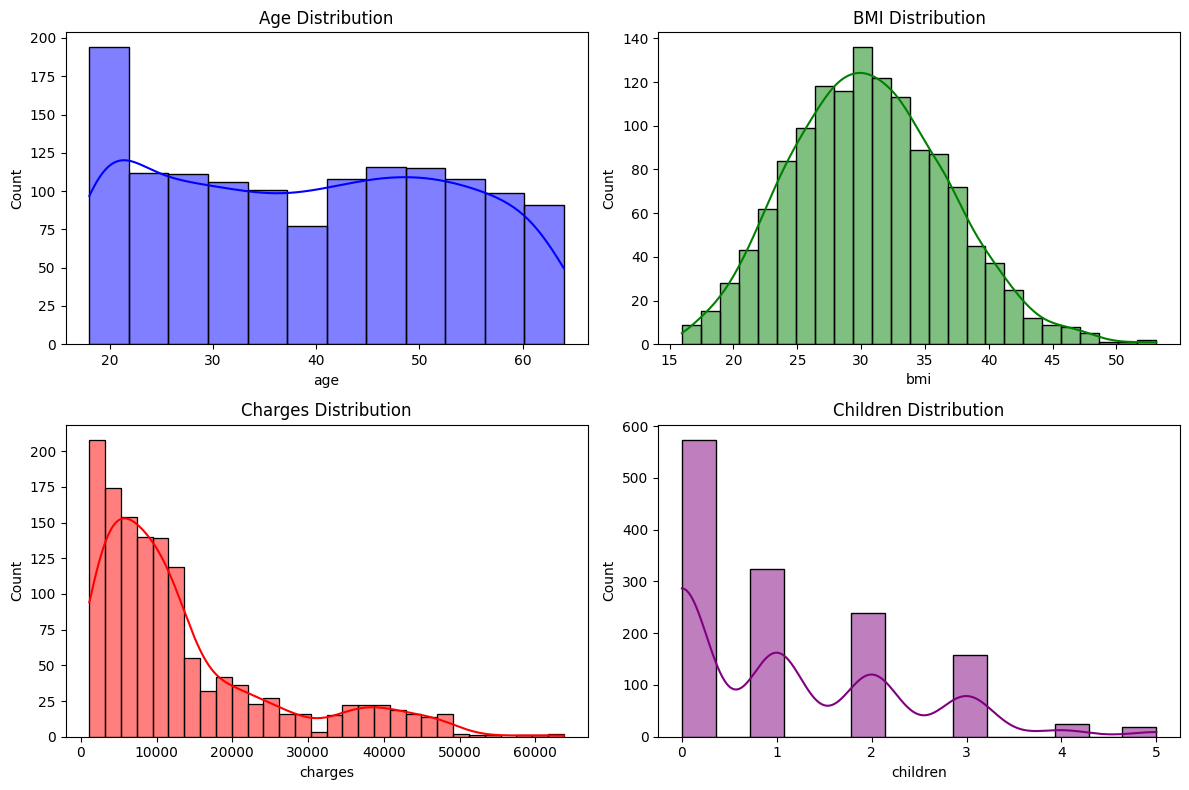

In [16]:
# EDA: Visualizing the distribution of numerical features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data['age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['bmi'], kde=True, color='green')
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['charges'], kde=True, color='red')
plt.title('Charges Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['children'], kde=True, color='purple')
plt.title('Children Distribution')

plt.tight_layout()
plt.show()

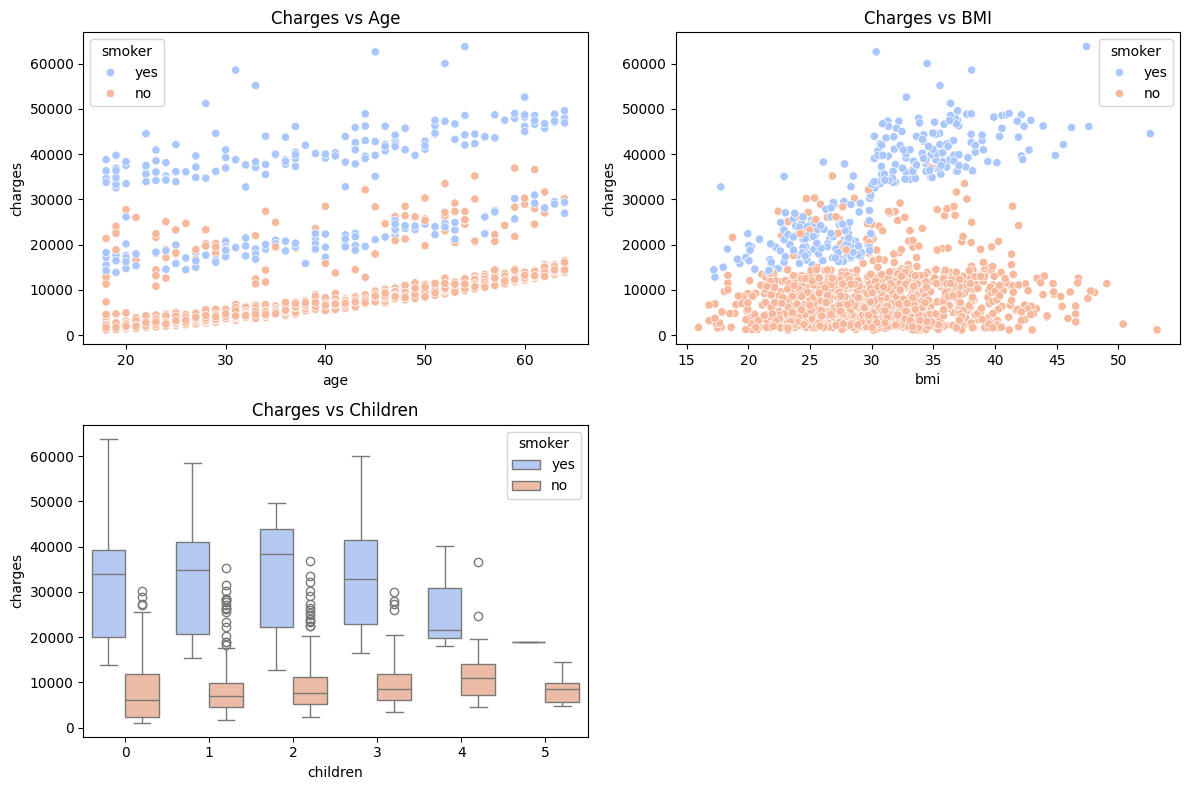

In [17]:
# EDA: Visualizing relationships between features and target variable
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x=data['age'], y=data['charges'], hue=data['smoker'], palette='coolwarm')
plt.title('Charges vs Age')

plt.subplot(2, 2, 2)
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'], palette='coolwarm')
plt.title('Charges vs BMI')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['children'], y=data['charges'], hue=data['smoker'], palette='coolwarm')
plt.title('Charges vs Children')

plt.tight_layout()
plt.show()

**MODEL DEVELOPMENT**

In [18]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

In [19]:
# Selecting features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

In [20]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Making predictions on the test set
y_pred = model.predict(X_test)

**MODEL EVALUATION**

In [23]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 33596915.85136145
Root Mean Squared Error: 5796.284659276273
Mean Absolute Error: 4181.19447375365
R-squared: 0.7835929767120724


**Mean Squared Error (MSE):** Measures the average of the squares of the errors (the average squared difference between the estimated values and the actual value).

**Root Mean Squared Error (RMSE):** The square root of the MSE, giving an error metric in the same units as the target variable.

**Mean Absolute Error (MAE):** Measures the average of the absolute errors (the average absolute difference between the estimated values and the actual value).

**R-squared (R²)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.


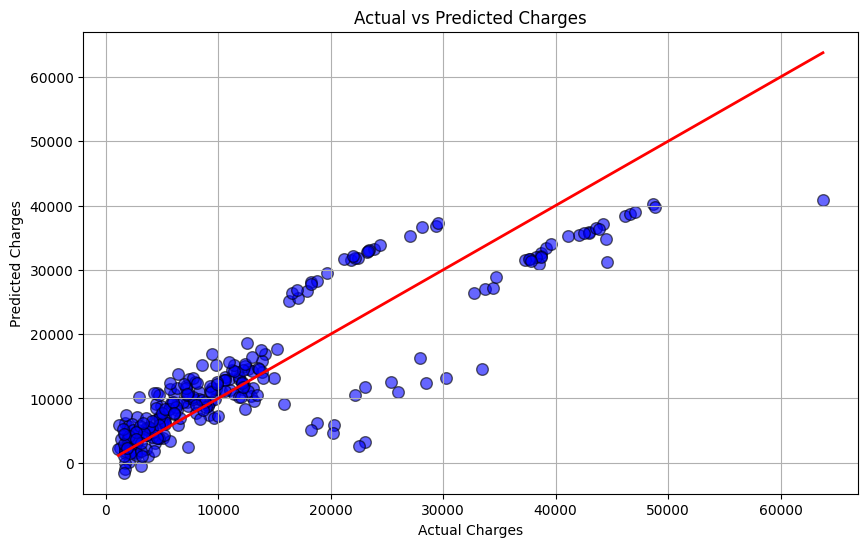

In [24]:
# Plotting the regression line and the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line representing perfect prediction
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.grid(True)
plt.show()

**RESULTS AND DISCUSSION**

**Findings**: The linear regression model's R-squared value indicates the proportion of variance in the target variable explained by the features.

**Interpretation:**
 A higher R-squared value implies a better fit for the model.

**Comparison:**
 Compare the performance of the model with other potential models (e.g., polynomial regression, ridge regression) in future work.

**Limitations:**
 Linear regression assumes a linear relationship between features and target variable, which may not always hold true.


**CONCLUSION**

The linear regression model provides a baseline for predicting insurance charges based on the given features.

**Future Work:**
Explore more advanced models and feature engineering techniques to improve prediction accuracy.
